In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
%matplotlib inline

In [2]:
pp = '/home/marco/PycharmProjects/ini_caltech101/'

In [3]:
import json
import matplotlib.ticker as mtick

fmt = '%3.f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
                             
def plot(history_json, nb_epochs=0, leg_locs=['upper right', 'lower right']):
    with open(history_json) as data_file:    
        data = json.load(data_file)
    
    fig, axs = plt.subplots(1,2, figsize=(20, 10))
    
    mean_loss = np.mean(data['loss'], axis=1)
    mean_val_loss = np.mean(data['val_loss'], axis=1)
    
    mean_acc = np.mean(data['acc'], axis=1)
    mean_val_acc = np.mean(data['val_acc'], axis=1)
    
    
    if 'val_class_acc' in data:
        mean_val_acc = np.mean(data['val_class_acc'], axis=1)
    else:
        mean_val_acc = np.mean(data['val_acc'], axis=1)
        
    if 'test_class_acc' in data:
        mean_test_acc = np.mean(data['test_class_acc'],axis=1)
    else:
        mean_test_acc = np.mean(data['test_acc'],axis=1)
    
    
    if nb_epochs:
        mean_loss = mean_loss[:nb_epochs]
        mean_val_loss = mean_val_loss[:nb_epochs]
        mean_acc = mean_acc[:nb_epochs]
        mean_val_acc = mean_val_acc[:nb_epochs]
        epochs = range(nb_epochs)
    else:
        epochs = range(len(mean_loss))
        
    # printing
    print "mean val acc: ", mean_val_acc
    print "mean test acc: ", mean_test_acc
    
    
    # plotting
    linewidth=2.0
    axs[0].plot(epochs, mean_loss, 'k--', label='Train loss', linewidth=linewidth)
    axs[0].plot(epochs, mean_val_loss, 'k:', label='Validation loss', linewidth=linewidth)
    
    axs[1].plot(epochs, mean_acc, 'k--', label='Train accuracy', linewidth=linewidth)
    axs[1].plot(epochs, mean_val_acc, 'k:', label='Validation accuracy', linewidth=linewidth)
    
    # Now add the legend with some customizations.
    for ax, leg_loc in zip([axs[0], axs[1]], leg_locs):
        ax.set_xlabel('Epoch', fontsize=20)
        ax.tick_params(labelsize=18)
        #x.set_xticks(ax.get_xticks(), minor=False)
        #ax.set_xticklabels(['{:0.0f}'.format(x) for x in epochs])
        #ax.set_minor_locator(mtick.MaxNLocator(integer=True))
        
        legend = ax.legend(loc=leg_loc)

        # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
        frame = legend.get_frame()
        frame.set_facecolor('0.90')

        # Set the fontsize
        for label in legend.get_texts():
            label.set_fontsize(20)

        for label in legend.get_lines():
            label.set_linewidth(3)  # the legend line width
    
    axs[0].set_ylabel('Cross-Entropy Loss', fontsize=24)
    axs[0].set_ylim(0.0, 5.0)
    
    axs[1].set_ylabel('Accuracy', fontsize=24)
    axs[1].set_ylim(0, 1.0)
    vals = axs[1].get_yticks()
    axs[1].set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
    
    return fig

## Batch Normalization and Zero Bias Constraint

mean val acc:  [ 0.56979192  0.70888764  0.78471277  0.80489646  0.82075266  0.8224036
  0.82253439  0.82122018  0.82266237  0.82289847  0.82171857  0.82385364
  0.82199427  0.82433796  0.82309061  0.82717096  0.82442403  0.82524422
  0.82735662  0.82661765]
mean test acc:  [ 0.82411904]


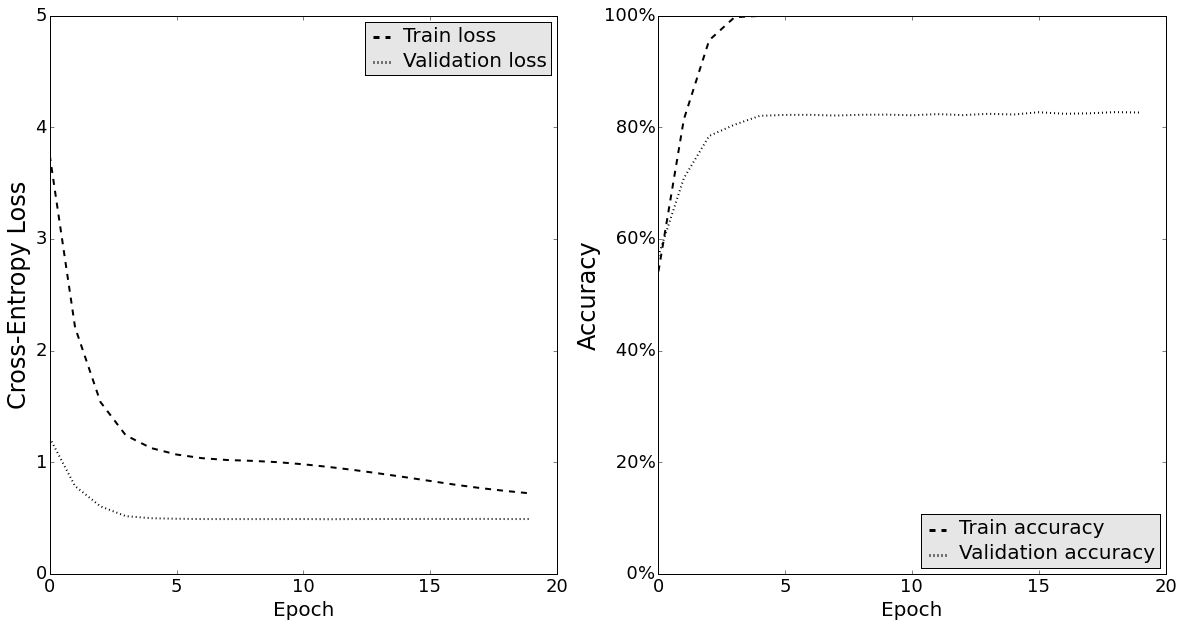

In [4]:
fig = plot(pp + 'results/2015-12-23_05.16.59_testing_class-weight-auto_bn_triangluar_cv1_e20_history.json')
fig.savefig(pp + 'report/images/bn_bias-constraint.png')

mean val acc:  [ 0.57564862  0.70126072  0.77497571  0.81114708  0.81839003  0.82396705
  0.82254196  0.82435334  0.82364855  0.82538655  0.82420597  0.82506968
  0.82381317  0.82421323  0.82824242  0.82793097  0.8297315   0.8253853
  0.82895269  0.82920621]
mean test acc:  [ 0.82539654]


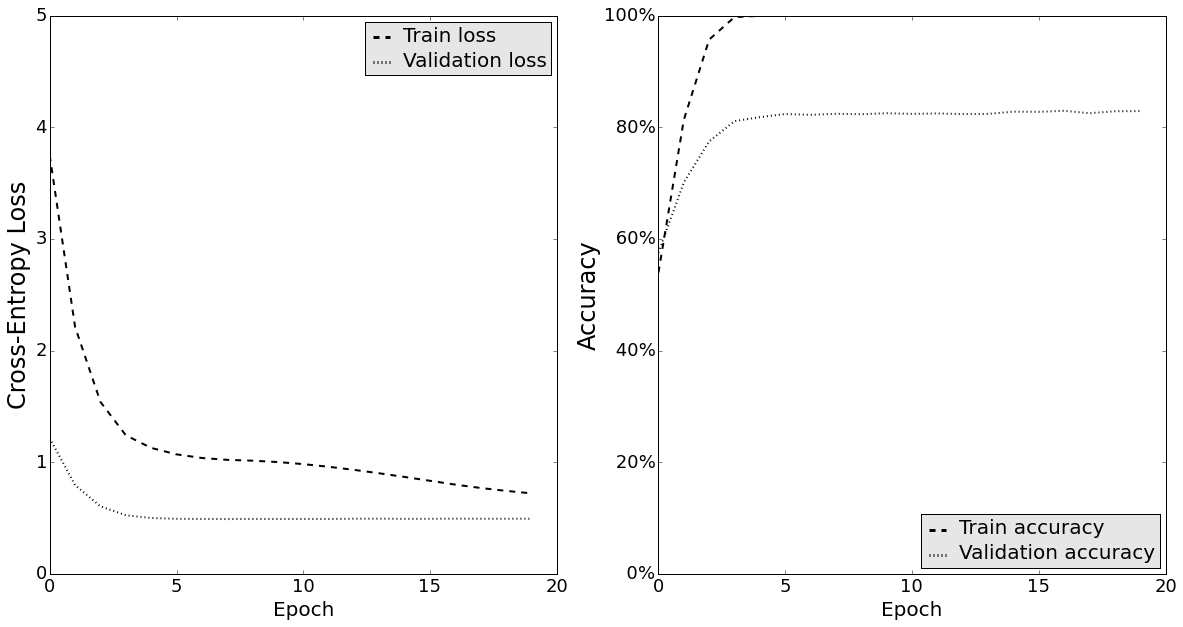

In [5]:
fig = plot(pp + 'results/2015-12-23_15.05.54_class-weight-auto_bn_triangluar_no-bconstraint_cv1_e20_history.json')
fig.savefig(pp + 'report/images/bn_no-bias-constraint.png')

mean val acc:  [ 0.29070756  0.39074711  0.49752912  0.536022    0.56481977  0.59424172
  0.61347393  0.61049881  0.61110864  0.62657974  0.62531929  0.63440873
  0.65082819  0.66129171  0.66660627  0.6679585   0.68939969  0.70897021
  0.71427459  0.7304286 ]
mean test acc:  [ 0.73975115]


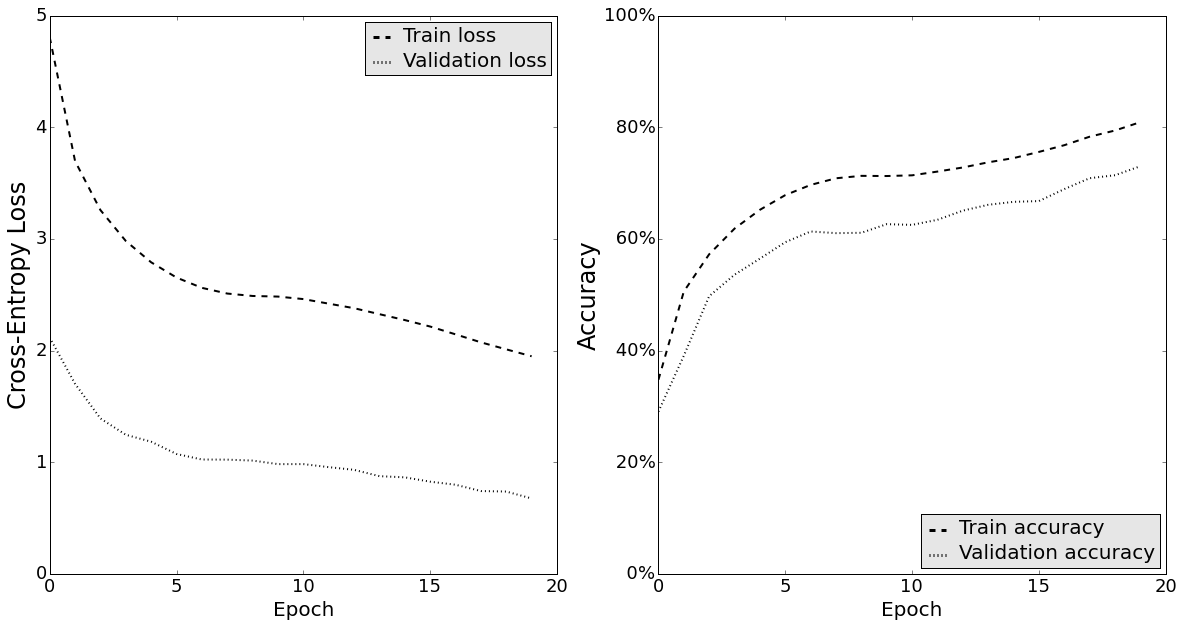

In [6]:
fig = plot(pp + 'results/2015-12-23_20.48.46_class-weight-auto_no-bn_triangluar-0.0001-0.01_cv1_e20_history.json')
fig.savefig(pp + 'report/images/no-bn_bias-constraint.png')

mean val acc:  [ 0.46416585  0.62377464  0.71084405  0.74269377  0.76296175  0.76993359
  0.77203362  0.77332819  0.77350666  0.77421364  0.77281141  0.77426402
  0.77349378  0.77592366  0.77915613  0.77541972  0.77827217  0.78057693
  0.77998305  0.78088421]
mean test acc:  [ 0.7825943]


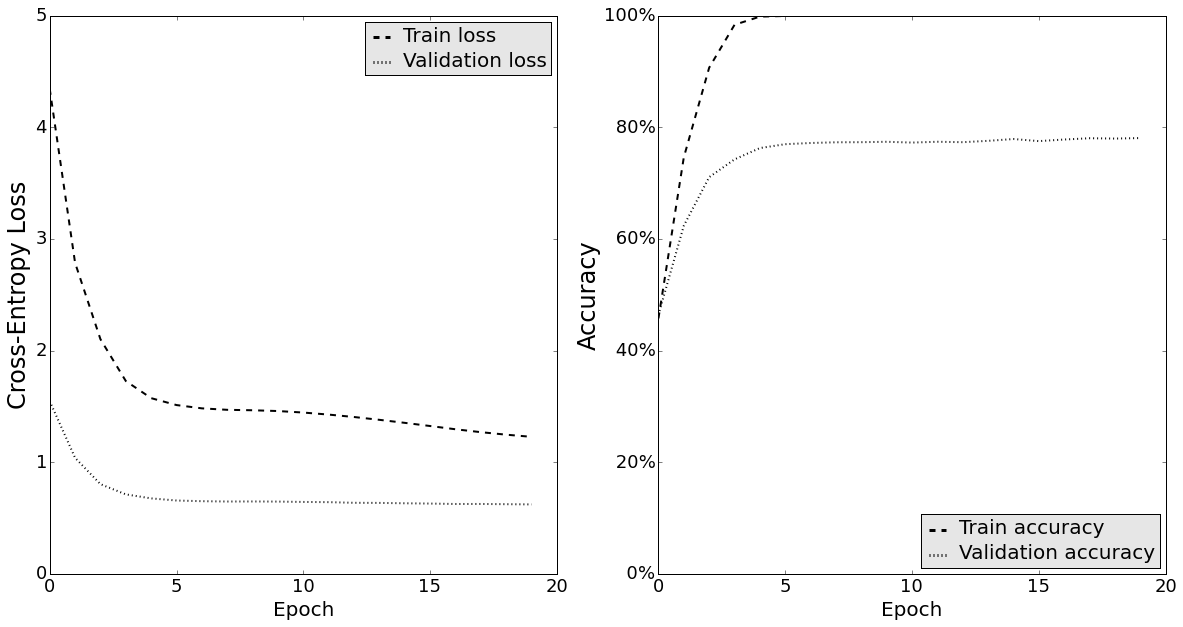

In [7]:
fig = plot(pp + 'results/2015-12-24_04.17.44_class-weight-auto_no-bn_triangluar-0.0001-0.01_no-bconstraint_cv1_e20_history.json')
fig.savefig(pp + 'report/images/no-bn_no-bias-constraint.png')

## Data Standardization

mean val acc:  [ 0.55295751  0.70741986  0.78733555  0.81046351  0.82324613  0.82719885
  0.82746668  0.82535803  0.82578316  0.82740927  0.82601253  0.82723547
  0.82890847  0.82968505  0.82948125  0.82799828  0.82838832  0.82924545
  0.82978089  0.82927581]
mean test acc:  [ 0.81862779]


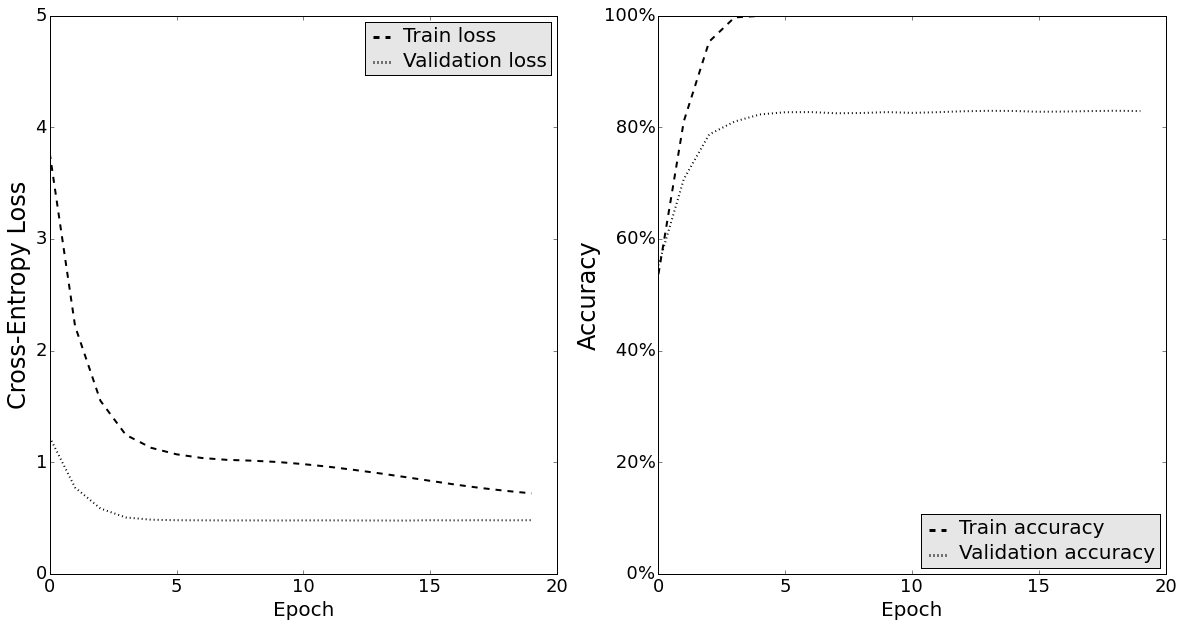

In [8]:
fig = plot(pp + 'results/2015-12-29_06.01.59_bn_triangular_no-data-normalization_cv1_e20_history.json')
fig.savefig(pp + 'report/images/no-data-standardization.png')

## Convolutional Kernel Size

mean val acc:  [ 0.53970457  0.68975417  0.77193935  0.80234875  0.81968243  0.82153511
  0.82261539  0.82320111  0.82415429  0.82382767  0.82438787  0.82421283
  0.82514633  0.82636666  0.82750535  0.82662537  0.82917633  0.8311359
  0.82729684  0.82989426]
mean test acc:  [ 0.8222704]


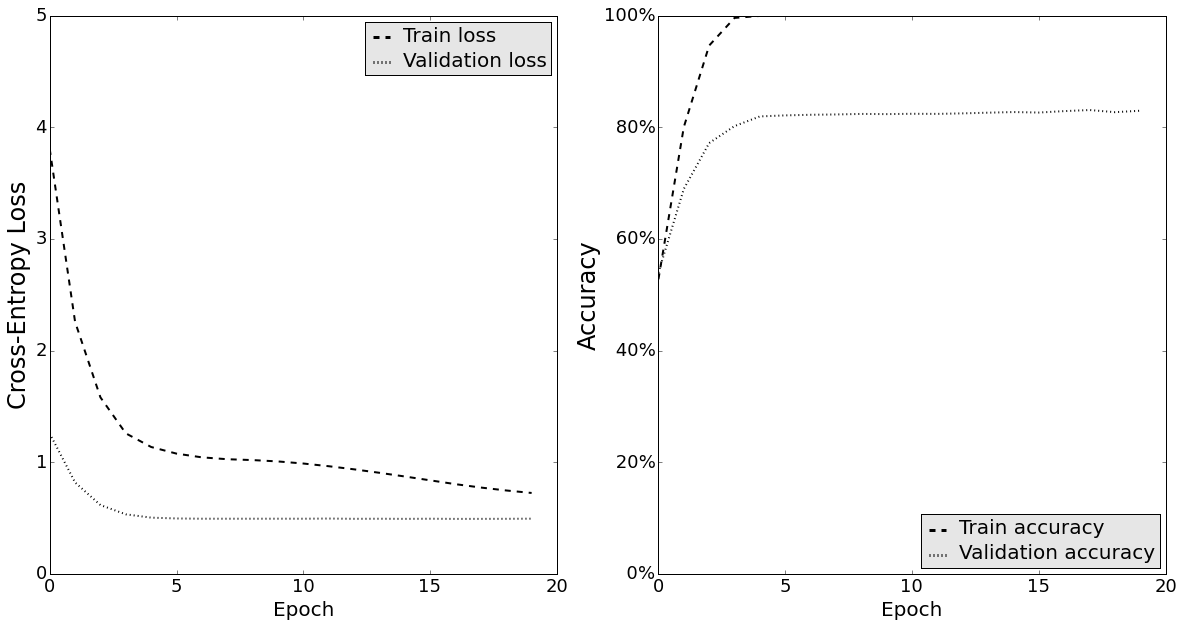

In [9]:
fig = plot(pp + 'results/2015-12-28_05.43.05_conv1-9x9_cv1_e20_history.json')
fig.savefig(pp + 'report/images/conv1-9x9.png')

## Triangular Learning Rate

mean val acc:  [ 0.06416747  0.27598866  0.47548922  0.61348227  0.68036781  0.72427379
  0.75488917  0.77157812  0.77043558  0.77544196  0.77484231  0.77705541
  0.77852074  0.77819806  0.77843416  0.77881407  0.77846503  0.77828248
  0.77751218  0.7790883 ]
mean test acc:  [ 0.77395311]


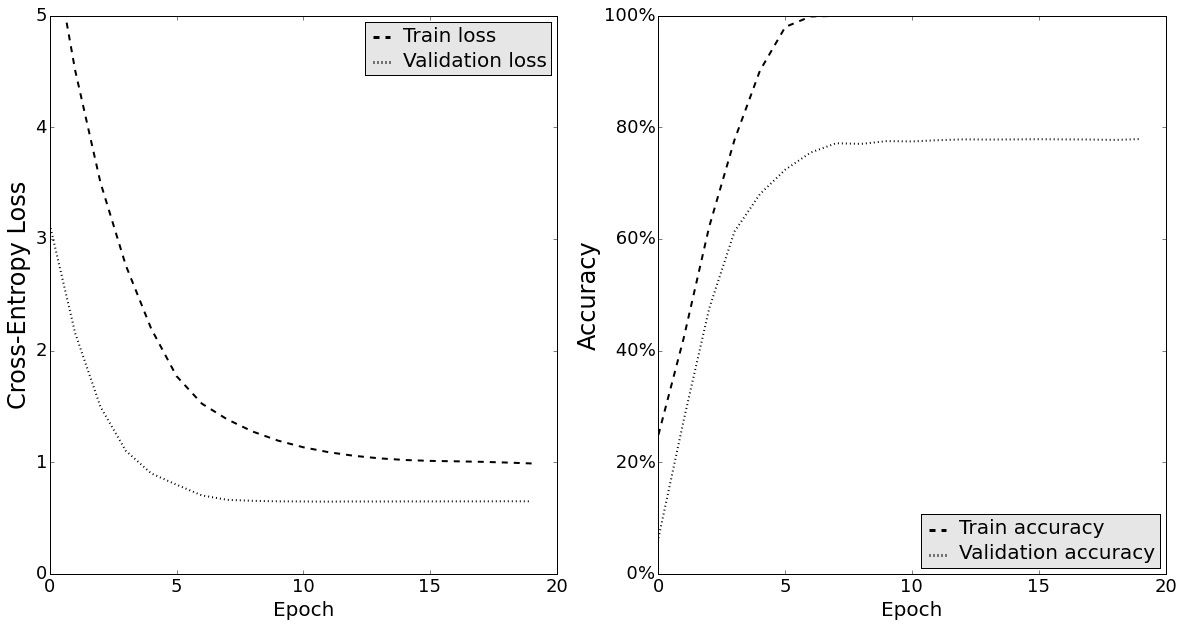

In [10]:
fig = plot(pp + 'results/2015-12-29_18.07.49_bn_triangular-minlr-to-maxlr_cv1_e20_history.json')
fig.savefig(pp + 'report/images/triangular-min-to-max.png')

# Appendix

mean val acc:  [ 0.69624126  0.79643794  0.83916084  0.87106643  0.87795017  0.8788243
  0.88090035  0.88013549  0.88057255  0.88046329  0.88057255  0.88046329
  0.88111888  0.88188374  0.88100962  0.88210227  0.88002622  0.88166521
  0.88144668  0.88079108]
mean test acc:  [ 0.88199206]


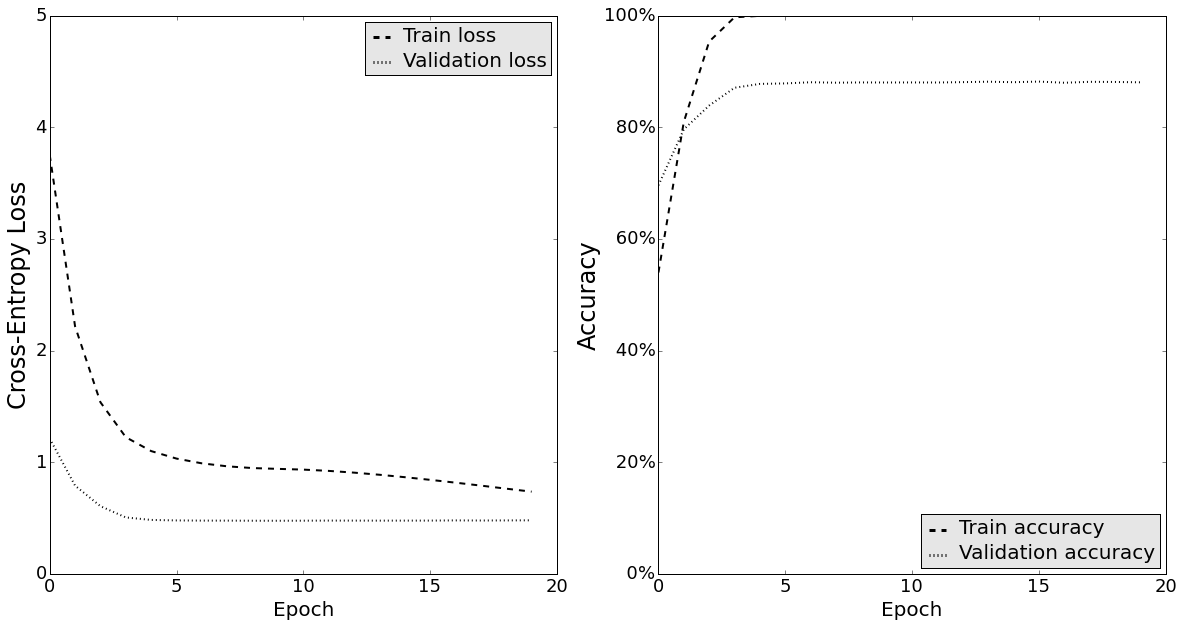

In [11]:
# base line

# batch normalization mode 1 modified, data normalization
# 20 epochs, batch size 64, 1200s per epoch
# triangular lr: lr=0.001, step_size=12000, max_lr=0.02
# 81378 train samples, 9104 validation samples, 10102 test samples -> train/test split loaded from disk
fig = plot(pp + 'results/2015-12-04_20.23.03_bn_triangular_e20_img-gen_history.json')
fig.savefig(pp + 'report/images/appendix-bn_triangular_e20.png')

### Architectures

mean val acc:  [ 0.58249563  0.71481643  0.7815778   0.82124126  0.84560752  0.86363636
  0.86855332  0.87434441  0.87816871  0.87805944  0.87751311  0.87445367
  0.88090035  0.88079108  0.8788243   0.88111888  0.8823208   0.88090035
  0.88243007  0.88439685]
mean test acc:  [ 0.8829993]


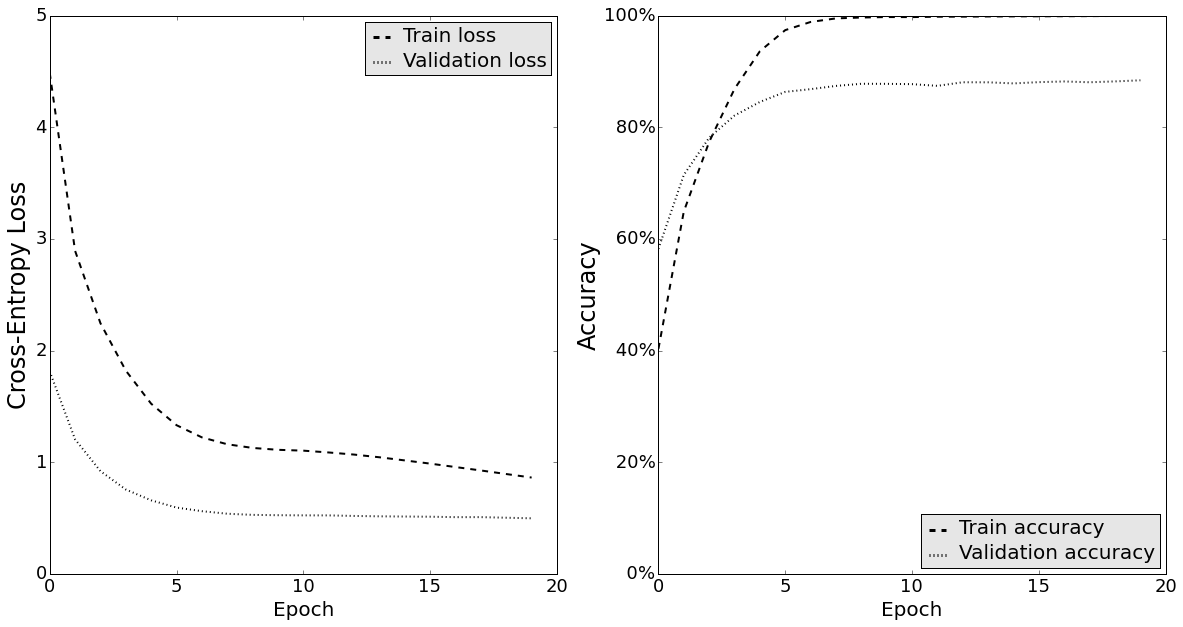

In [12]:
# batch normalization mode 1 modified, data normalization
# 20 epochs, batch size 64,  1200s per epoch
# 81378 train samples, 9104 validation samples, 10102 test samples -> train/test split loaded from disk
# triangular lr: lr=0.001, step_size=12000, max_lr=0.02

# dropout between fully connected layers

fig = plot(pp + 'results/2015-12-07_20.50.45_bn_triangular_dropout-fc_e20_img-gen_history.json')
fig.savefig(pp + 'report/images/appendix-bn_triangular_dropout-fc_e20.png')

mean val acc:  [ 0.65701486  0.74912587  0.79589161  0.81359266]
mean test acc:  [ 0.84304677]


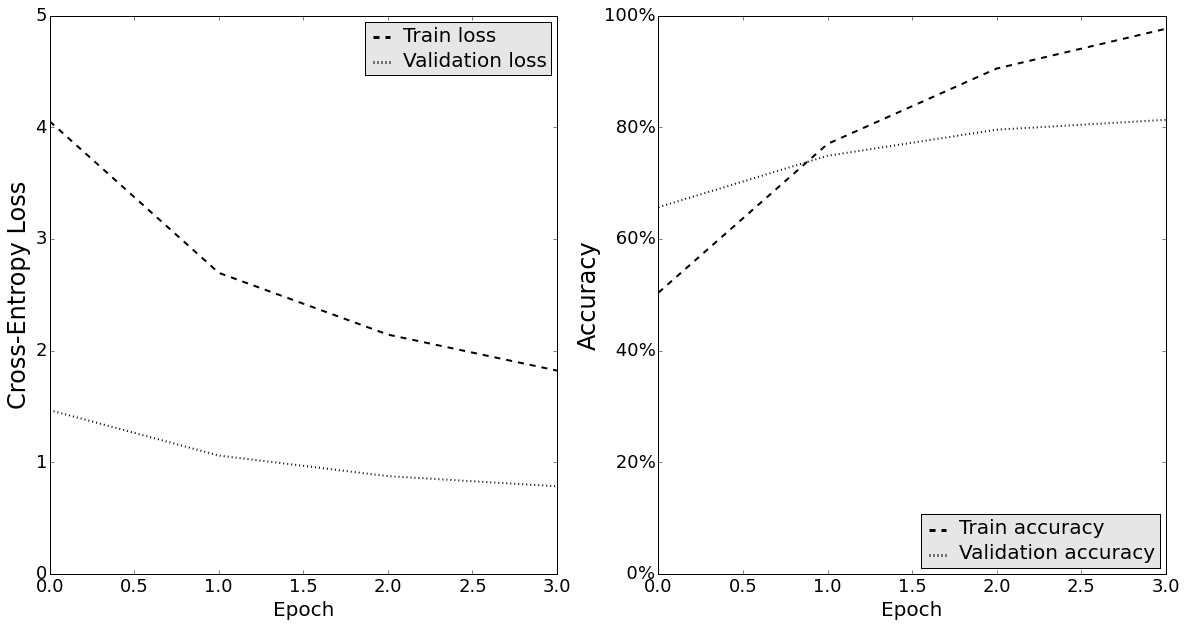

In [13]:
# batch normalization mode 1 modified, data normalization
# 8 epochs, batch size 64,  per epoch
# 81378 train samples, 9104 validation samples, 10102 test samples -> train/test split loaded from disk
# lr 0.02, lr_decay = 3e-3

fig = plot(pp + 'results/2015-11-23_17.13.31_bn-mode1-modified_img-gen_history.json', nb_epochs=4)
fig.savefig(pp + 'report/images/appendix-bn_lr-0.02_e4.png')

mean val acc:  [ 0.60544143  0.68531469  0.71798514  0.73295455]
mean test acc:  [ 0.74272958]


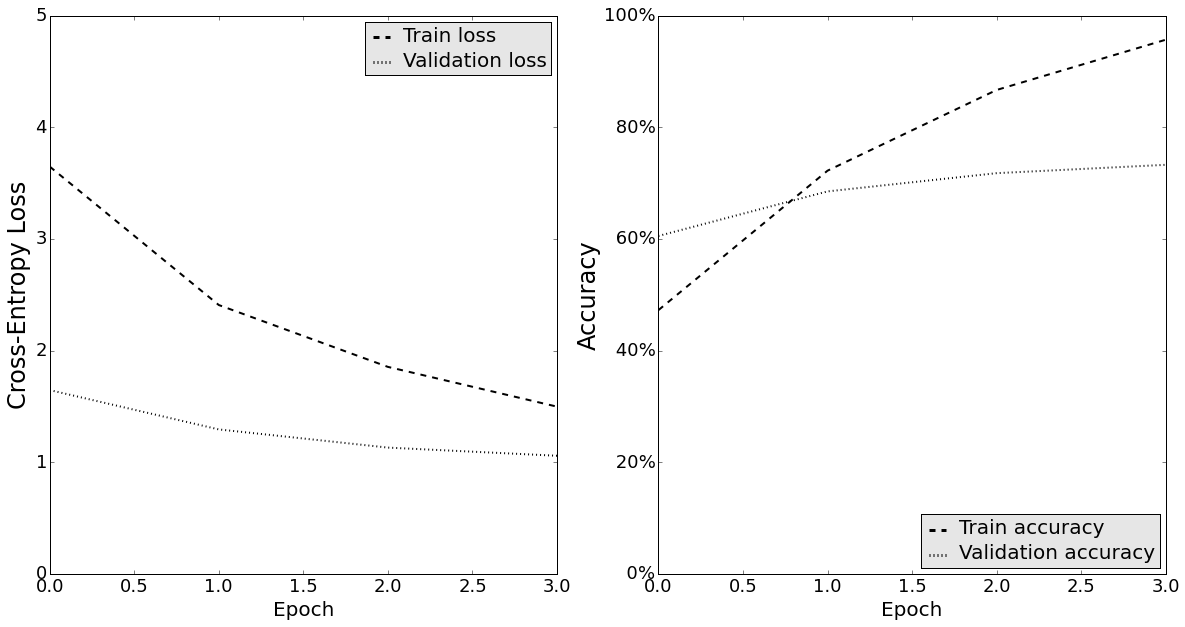

In [14]:
# batch normalization mode 1 modified, data normalization
# 4 epochs, batch size 64,  per epoch
# 81378 train samples, 9104 validation samples, 10102 test samples -> train/test split loaded from disk
# lr 0.02, lr_decay = 3e-3

# conv1 - relu - conv2 - relu - max pooling

fig = plot(pp + 'results/2015-12-03_18.54.00_bn_conv1-relu-conv2-relu-maxp_img-gen_history.json')
fig.savefig(pp + 'report/images/appendix-bn_lr-0.02_no-maxpooling1_e4.png')

### Batch Normalization

mean val acc:  [ 0.49224213  0.64379371  0.72541521  0.76748252  0.79774913  0.80998689
  0.81818182  0.82189685  0.82725087  0.82550262  0.82790647  0.82746941
  0.82757867  0.8284528   0.83184003  0.82856206  0.8316215   0.83085664
  0.82899913  0.83129371  0.8319493   0.82998252  0.83184003  0.83238636
  0.83249563  0.8316215   0.83151224  0.83085664  0.82932692  0.8322771
  0.8326049   0.83336976  0.83184003  0.83216783  0.83446241  0.83347902
  0.83271416  0.83347902  0.83369755  0.83358829]
mean test acc:  [ 0.83618656]


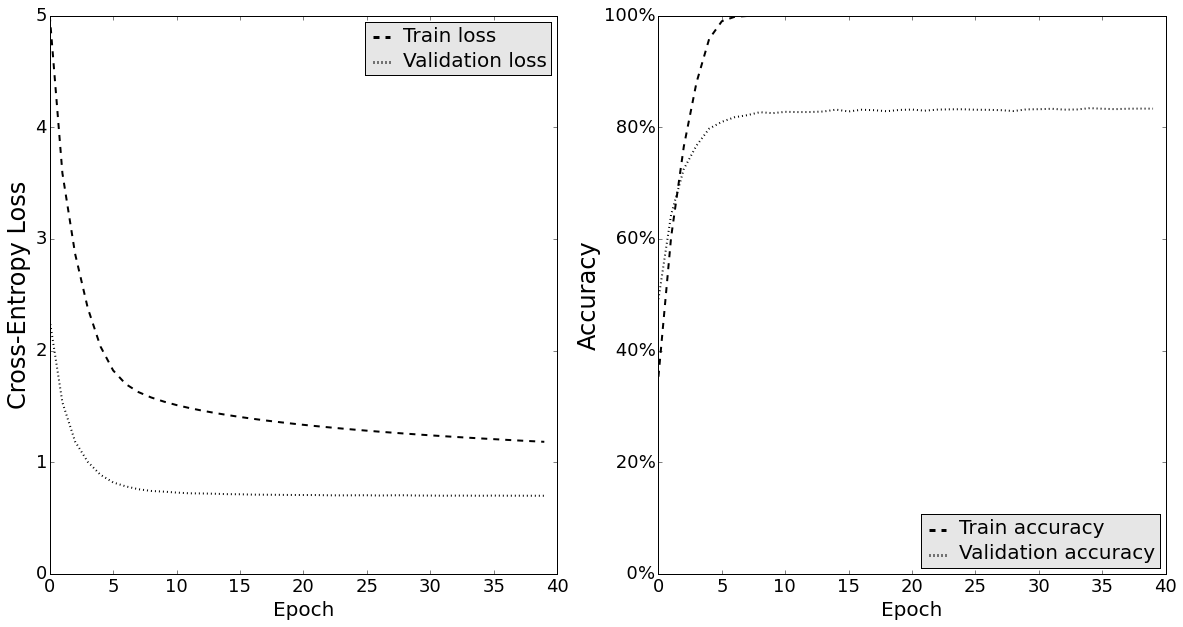

In [15]:
# batch normalization mode 1 modified, data normalization
# 40 epochs, batch size 64,  1200 - 1500s per epoch
# 81378 train samples, 9104 validation samples, 10102 test samples -> train/test split loaded from disk
# lr=0.005

fig = plot(pp + 'results/2015-12-11_21.33.54_bn_lr-0.005_e40_img-gen_history.json')
fig.savefig(pp + 'report/images/appendix-bn_lr-0.005_e40.png')

mean val acc:  [ 0.43422203  0.51190997  0.57145979  0.5895979   0.61691434  0.64324738
  0.66400787  0.68586101  0.69886364  0.70913462  0.71481643  0.7270542
  0.73721591  0.74836101  0.74519231  0.75666521  0.76311189  0.77141608
  0.78201486  0.78256119  0.78190559  0.79709353  0.796875    0.79993444
  0.80758304  0.80845717  0.81206294  0.80714598  0.8163243   0.81741696
  0.81719843  0.82113199  0.82823427  0.82790647  0.83205857  0.83118444
  0.83522727  0.83413462  0.83916084  0.8402535 ]
mean test acc:  [ 0.83992616]


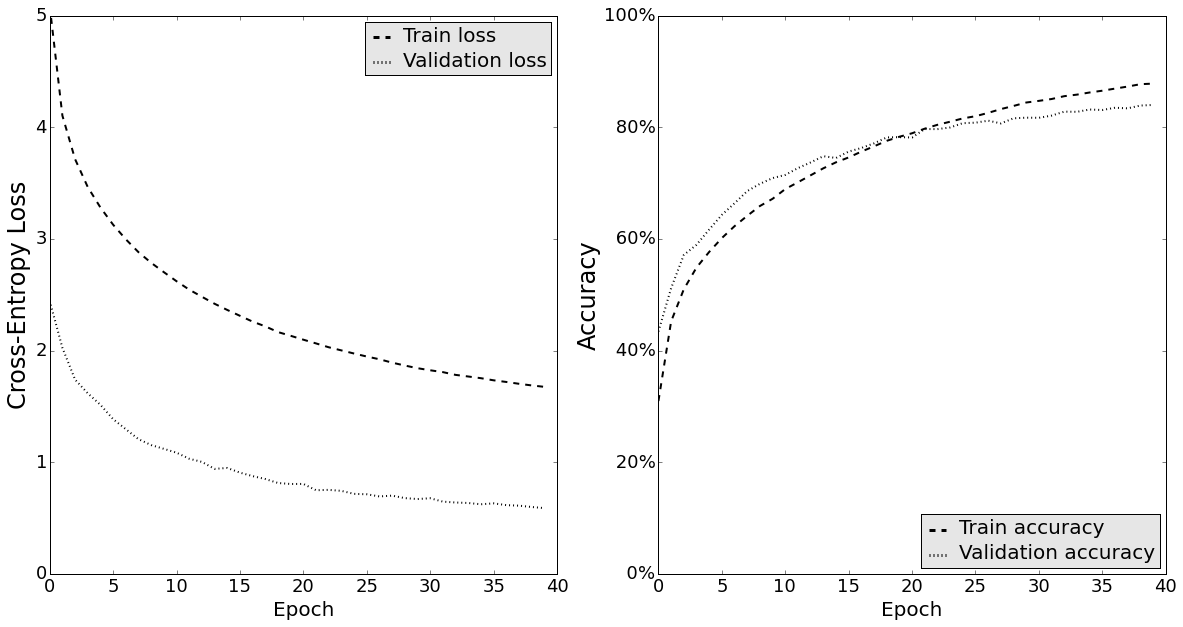

In [16]:
# no batch normalization, data normalization
# 40 epochs, batch size 64,  810s per epoch
# 81378 train samples, 9104 validation samples, 10102 test samples -> train/test split loaded from disk
# lr=0.005

fig = plot(pp + 'results/2015-12-13_19.06.00_no-bn_lr-0.005_e40_img-gen_history.json')
fig.savefig(pp + 'report/images/appendix-no-bn_lr-0.005_e40.png')

### Zero Bias Constraint

mean val acc:  [ 0.69143357  0.8013549   0.84680944  0.86298077  0.86145105  0.86112325
  0.86527535  0.86538462  0.87194056  0.87401661  0.875       0.87674825
  0.87489073  0.87598339  0.87456294  0.87674825  0.87707605  0.87565559
  0.87729458  0.87565559]
mean test acc:  [ 0.8772086]


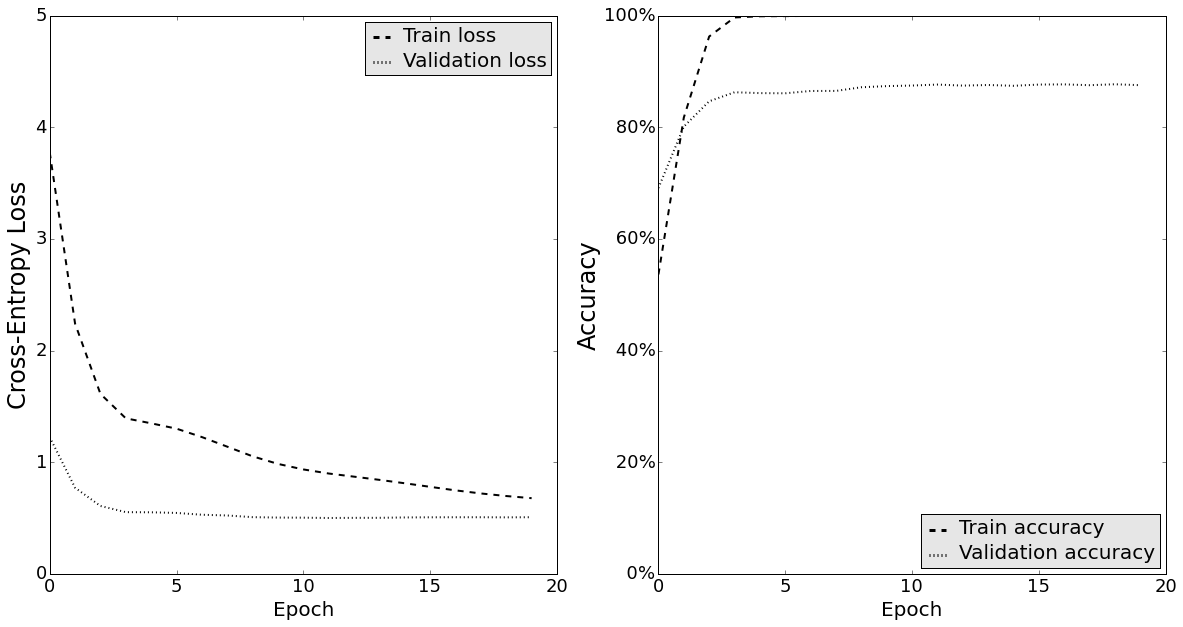

In [17]:
# batch normalization, data normalization
# 40 epochs, batch size 64,  810s per epoch
# 81378 train samples, 9104 validation samples, 10102 test samples -> train/test split loaded from disk
# triangular lr: lr=0.001, max_lr=0.02

# no zero bias constraint

data = plot(pp + 'results/2015-12-14_12.36.22_bn_triangluar_no-b-constraint_e40_img-gen_history.json', nb_epochs=20)
fig.savefig(pp + 'report/images/appendix-bn_triangular_no-zero-b-constraint_e20.png')

### Convolutional Kernel Size

mean val acc:  [ 0.69077797  0.78780594  0.78758741  0.77829983  0.82888986  0.84659091
  0.84670017  0.84954108  0.85041521  0.85227273  0.85216346  0.85260052
  0.85380245  0.85325612  0.85369318  0.85194493  0.85347465  0.85325612
  0.85369318  0.85183566]
mean test acc:  [ 0.86338197]


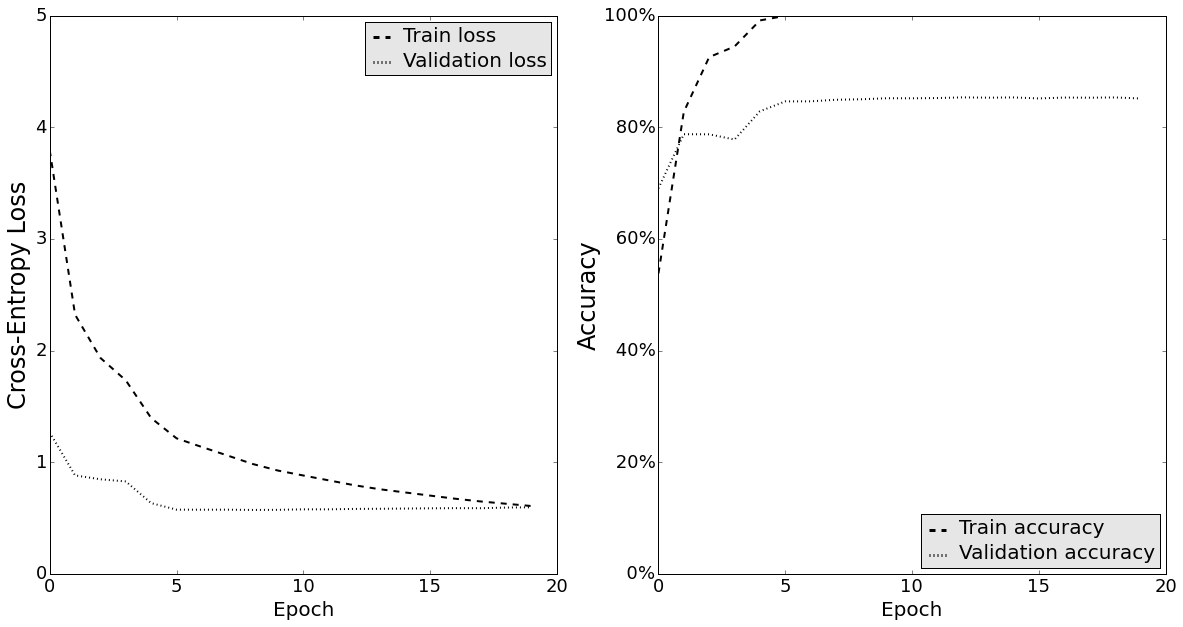

In [18]:
# batch normalization, data normalization
# 40 epochs, batch size 64,  1250s per epoch
# 81378 train samples, 9104 validation samples, 10102 test samples -> train/test split loaded from disk
# triangular lr: lr=0.001, max_lr=0.02

# conv1 3x3 instead of 5x5

fig = plot(pp + 'results/2015-12-17_06.05.25_bn_triangluar_conv1-3x3_e40_img-gen_history.json', nb_epochs=20)
fig.savefig(pp + 'report/images/appendix-bn_triangular_conv1-3x3_e20.png')

mean val acc:  [ 0.68105332  0.78398164  0.7854021   0.78015734  0.8354458   0.85511364
  0.86068619  0.8597028   0.86221591  0.86254371  0.86429196  0.86112325
  0.8635271   0.86396416  0.86330857  0.86560315  0.86461976  0.86429196
  0.86593094  0.86724213]
mean test acc:  [ 0.86874048]


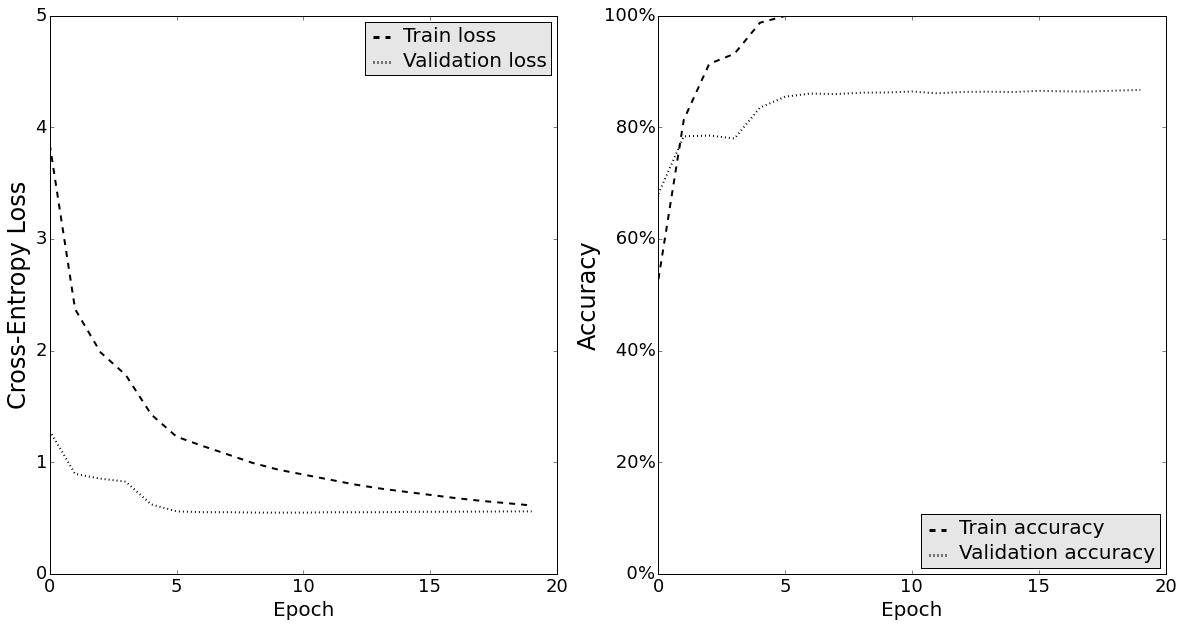

In [19]:
# batch normalization, data normalization
# 40 epochs, batch size 64,  1250s per epoch
# 81378 train samples, 9104 validation samples, 10102 test samples -> train/test split loaded from disk
# triangular lr: lr=0.001, max_lr=0.02

# conv1 9x9 instead of 5x5

fig = plot(pp + 'results/2015-12-16_11.50.53_bn_triangluar_conv1-9x9_e40_img-gen_history.json', nb_epochs=20)
fig.savefig(pp + 'report/images/appendix-bn_triangular_conv1-9x9_e20.png')